# Show Models

## Imports

Importamos las librerías y parámetros que necesitaremos en la ejecución del Notebook.

In [1]:
import sys
sys.path.append("..")
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from IPython.display import SVG
from keras import utils
from mgmtfm import models
from keras import utils
from IPython.display import Image

print("Notebook ejecutado el {}.".format(datetime.now().strftime("%d-%m-%Y")))

Using TensorFlow backend.


Notebook ejecutado el 14-11-2019.


## Modelos

A continuación presentamos la arquitectura de los diferentes modelos que hemos entrenado. Para ello cargaremos un modelo de cada tipo y lo mostraremos usando el módulo utils de *keras*, comentando las características de cada modelo, el *input* que debe tener y el *output* esperado.




### CNN

En primer lugar mostramos la arquitectura de un modelo creado con redes neuronales convolucionales:

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


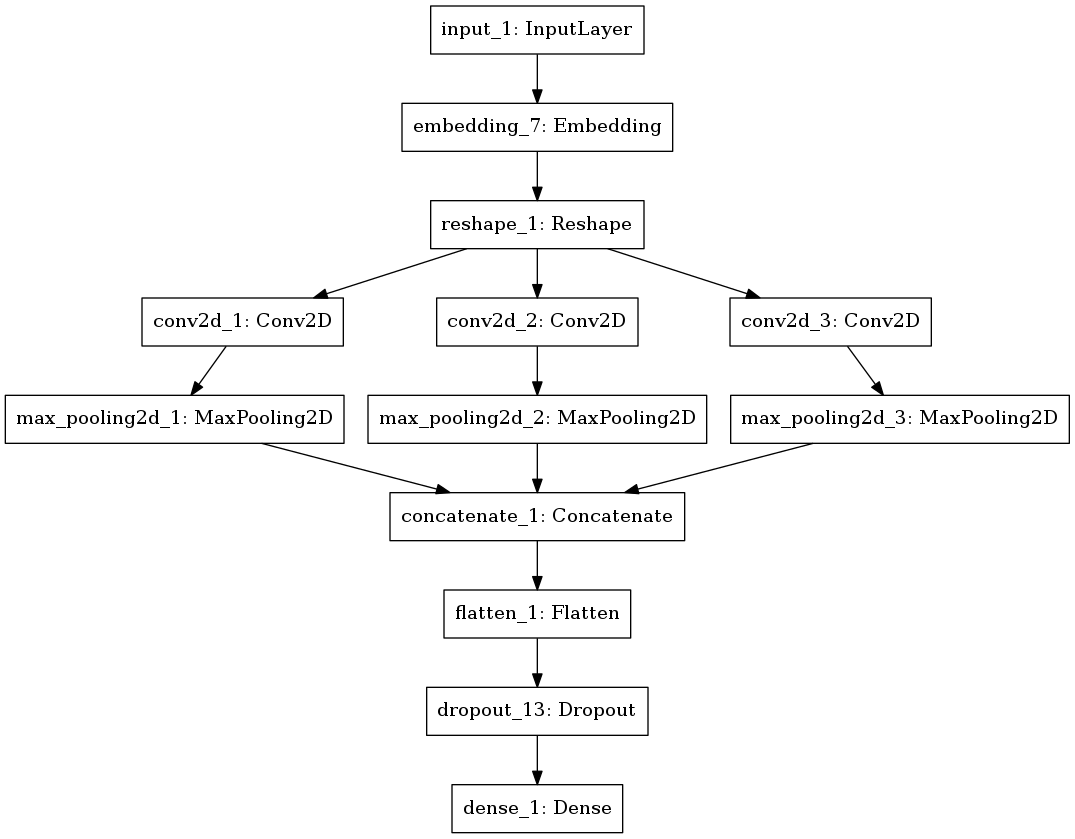

In [2]:
def plot_model(model_name):
    model = models.Models(load=True, path="../trained_models/" + model_name + ".h5")
    utils.plot_model(model._model)
    return Image(retina=True, filename='model.png')


plot_model("CNN_IVR_BIN_W2V150QC_QR_QN_AVERÍA_31_20191106")

Observamos tras el Input, una primera capa de *embedding* que recibe los documentos, en nuestro caso usamos Word2Vec, y alimenta a varias capas convolucionales. El resultado de estas es concatenado tras pasar por una capa de *maxpooling*, posteriormente el resultado es aplanado y utilizamos *dropout* para evitar el sobrentrenamiento antes de pasarlo a una última capa totalmente conectada. 
<BR>
    
Esta última capa, dependiendo de si se trata de una clasificación binaria o multiclase utilizará la función de activación *sigmoid* o *softmax* respectivamente. 

### RNN1

A continuación vamos a mostrar la arquitectura de un modelo de redes neuronales recurrentes. El modelo puede ser utilizado indistintamente con celdas GRU o LSTM y en las pruebas se ha visto que, aunque el rendimiento sea similar, las celdas GRU requieren un tiempo de entrenamiento menor.

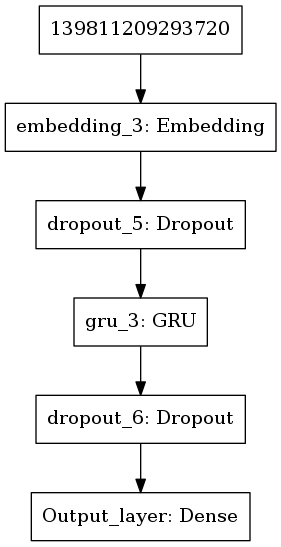

In [3]:
plot_model("RNN_IVR_BIN_W2V150QC_QR_QN_BAJA_1422_20191105")

En este caso vemos que tras el Input y embedding tenemos una capa con celdas GRU (podrían ser LSTM) situada entre dos funciones de *dropout* para evitar el sobrentrenamiento. 
<BR>

Finaliza la arquitectura una capa totalmente conectada. Esta capa, dependiendo de si se trata de una clasificación binaria o multiclase utilizará la función de activación *sigmoid* o *softmax* respectivamente. 

### RNN2

En este caso combinaremos capas comvolucionales con capas recurrentes en nuestro modelo. La primera capa convolucional extraerá las características "más locales" (como si estuvieramos obteniendo N-gramas de forma automática) para alimentar posteriormente el modelo recurrente.

Instructions for updating:
Use tf.cast instead.


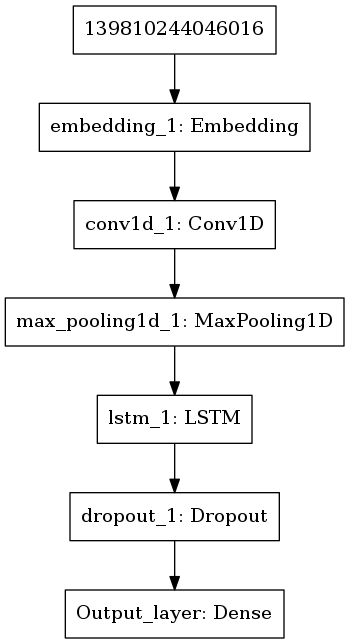

In [4]:
plot_model("RNN2_IVR_BIN_W2V150QC_QR_QN_COMERCIAL_2_20191106")

Vemos que tras el Input y el embedding tenemos una capa convolucional seguida de un *MaxPooling*. La salida del *pooling* es la entrada de una red recurrente (con celdas LSTM o GRU), que posteriormente y, de nuevo tras un *dropout* alimentan a una capa totalmente conectada.
<BR>
    
Esta última capa, dependiendo de si se trata de una clasificación binaria o multiclase utilizará la función de activación *sigmoid* o *softmax* respectivamente. 

## Dense

Esta arquitectura que presentamos difiere de las anteriores, ya que en este caso no trabajamos con secuencias de texto. Nuestra entrada será un único vector numérico obtenido mediante Doc2Vec. Por este motivo podemos usar una red neuronal más simple compuesta por capas totalmente conectadas:


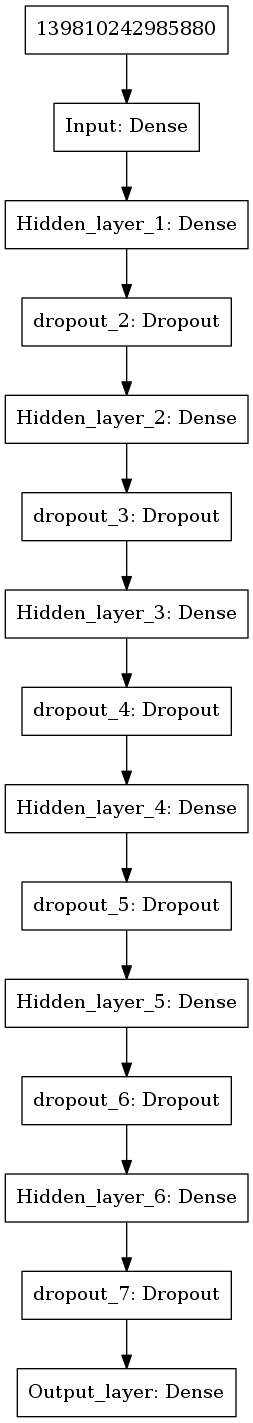

In [5]:
plot_model("DENSE_IVR_BIN_D2V500w7m2_RECLAMACIÓN_4134_20191114")

Podemos ver la simplicidad del modelo que consiste en una capa de entrada que recibe el vector Doc2Vec y N capas ocultas seguidas de una función de *dropout* para evitar sobrentrenamiento. Las capas del modelo, a excepción de la capa de salida, usan la función de activación *relu*. 
<BR>

La última capa totalmente conectada (*output_layer*), dependiendo de si se trata de una clasificación binaria o multiclase utilizará la función de activación *sigmoid* o *softmax* respectivamente. 

## Stacking

La última arquitectura que presentamos tiene cómo proposito combinar diferentes modelos, pensado inicialmente para combinar modelos binarios, con el objetivo de obtener un nuevo modelo más potente.

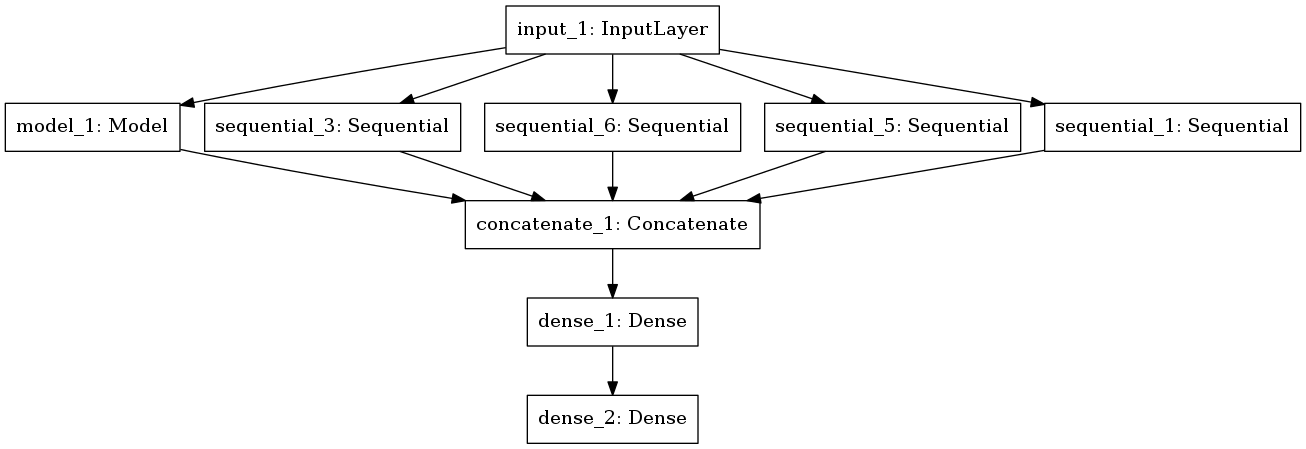

In [6]:
plot_model("stacked_model")

Vemos que el *input* alimenta a los diferentes modelos (5 en este caso), que pueden estar construidos tanto con el modelo *Model* de *keras* como con el modelo *Sequential*. 
<BR>
    
La salida de los diferentes modelos se concatena y, antes de la salida, se añade una capa oculta totalmente conectada con función de activación *relu*. Normalmente este tipo de modelos no vamos a usarlos en clasificación binaria por lo que la función de activación de la capa de salida será *sigmoid*.
<BR>
    
Hay que destacar que los *sub-modelos* que forman parte de este modelo estan preentrenados y no volverán a entrenarse en el proceso de aprendizaje.